# 載入所需套件

In [1]:
import requests
from datetime import datetime
from io import StringIO
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 定義爬取個股股價資料函數

In [2]:
def crawl_price(stock_id):
    #timestamp():換算成秒
    now=int(datetime.now().timestamp())+86400
    #period1:起始時間從1970年,period2:單位為1970年起過了n秒
    url='https://query1.finance.yahoo.com/v7/finance/download/{}?period1=0&period2={}&interval=1d&events=history&crumb=hP2rOschxO0'.format(stock_id,now)
    response=requests.post(url)
    #利用StringIO()創造虛擬的檔案
    f=StringIO(response.text)
    df=pd.read_csv(f,index_col='Date',parse_dates=['Date'])
    
    return df

# 定義爬取Yahoo全球指數名單函數

In [3]:
def world_index_tickers():
    url='https://finance.yahoo.com/world-indices/'
    dfs=pd.read_html(url)
    world_index=dfs[0]
    world_index.drop(['Intraday High/Low','52 Week Range','Day Chart'],axis=1,inplace=True)
    
    return world_index

# 定義爬取和合併股價資料函數

In [4]:
def get_compile_data():        
    symbols=world_index['Symbol'].values.tolist()
    names=world_index['Name'].values.tolist()
    
    world_index_history={}
    for symbol,name in zip(symbols,names):
        world_index_history[name]=crawl_price(symbol)
        #去除重複索引值資料
        world_index_history[name]=world_index_history[name][~world_index_history[name].index.duplicated()]
        print(name)
        time.sleep(1)
        
    adjclose={}
    for name,price in world_index_history.items():
        adjclose[name]=price['Adj Close']

    adjclose=pd.DataFrame(adjclose)
    
    return world_index_history,adjclose

# 爬取Yahoo全球指數名單

In [5]:
world_index=world_index_tickers()
world_index.head()

,Symbol,Name,Last Price,Change,% Change,Volume
0,^GSPC,S&P 500,2888.68,41.08,+1.44%,2.063B
1,^DJI,Dow 30,25886.01,306.62,+1.20%,276.212M
2,^IXIC,Nasdaq,7895.99,129.38,+1.67%,1.792B
3,^NYA,NYSE COMPOSITE (DJ),12580.41,170.87,+1.38%,0
4,^XAX,NYSE AMEX COMPOSITE INDEX,2400.48,25.01,+1.05%,0


# 爬取全球指數名單股價資料

In [6]:
world_index_history,adjclose=get_compile_data()

S&P 500
Dow 30
Nasdaq
NYSE COMPOSITE (DJ)
NYSE AMEX COMPOSITE INDEX
Cboe UK 100 Price Return
Russell 2000
Vix
FTSE 100
DAX PERFORMANCE-INDEX
CAC 40
ESTX 50 PR.EUR
EURONEXT 100
BEL 20
MOEX Russia Index
Nikkei 225
HANG SENG INDEX
SSE Composite Index
STI Index
S&P/ASX 200
ALL ORDINARIES
S&P BSE SENSEX
Jakarta Composite Index
FTSE Bursa Malaysia KLCI
S&P/NZX 50 INDEX GROSS
KOSPI Composite Index
TSEC weighted index
S&P/TSX Composite index
IBOVESPA
IPC MEXICO
S&P/CLX IPSA
MERVAL
TA-125
EGX 30 Price Return Index
Top 40 USD Net TRI Index


In [49]:
world_index_history['TSEC weighted index'].tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-08-02,10641.280273,10641.280273,10524.679688,10549.040039,10549.040039,2.744020e+09
2019-08-05,10528.870117,10542.490234,10418.250000,10423.410156,10423.410156,2.228421e+09
2019-08-06,10304.879883,10425.599609,10180.040039,10394.750000,10394.750000,2.378234e+09
2019-08-07,10422.889648,10461.370117,10366.540039,10386.179688,10386.179688,1.979944e+09
2019-08-08,10383.620117,10500.769531,10383.620117,10494.490234,10494.490234,2.023947e+09


In [7]:
adjclose.tail()

,S&P 500,Dow 30,Nasdaq,NYSE COMPOSITE (DJ),NYSE AMEX COMPOSITE INDEX,Cboe UK 100 Price Return,Russell 2000,Vix,FTSE 100,DAX PERFORMANCE-INDEX,...,KOSPI Composite Index,TSEC weighted index,S&P/TSX Composite index,IBOVESPA,IPC MEXICO,S&P/CLX IPSA,MERVAL,TA-125,EGX 30 Price Return Index,Top 40 USD Net TRI Index
Date,,,,,,,,,,,,,,,,,,,,,
2019-08-08,2938.090088,26378.189453,8039.160156,12828.820313,2453.199951,12317.570313,1532.130005,16.910000,7285.899902,11845.410156,...,1920.609985,10494.490234,16404.500000,104115.0,40439.421875,NaN,41093.449219,1505.469971,14180.400391,3540.229980
2019-08-09,2918.649902,26287.439453,7959.140137,12748.419922,2442.429932,12271.700195,1513.040039,17.969999,7253.899902,11693.799805,...,1937.750000,NaN,16341.299805,103996.0,40421.281250,NaN,44355.089844,NaN,NaN,NaN
2019-08-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-12,2882.699951,25896.439453,7863.410156,12586.240234,2426.489990,12264.700195,1495.900024,21.090000,7226.700195,11679.679688,...,1942.290039,10472.360352,16237.799805,101915.0,39851.210938,NaN,27530.800781,1497.719971,NaN,3467.600098
2019-08-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1928.839966,10379.290039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 繪製全球指數名單股價相關性熱度圖

In [57]:
corr=adjclose.corr()
corr.head()

,S&P 500,Dow 30,Nasdaq,NYSE COMPOSITE (DJ),NYSE AMEX COMPOSITE INDEX,Cboe UK 100 Price Return,Russell 2000,Vix,FTSE 100,DAX PERFORMANCE-INDEX,...,KOSPI Composite Index,TSEC weighted index,S&P/TSX Composite index,IBOVESPA,IPC MEXICO,S&P/CLX IPSA,MERVAL,TA-125,EGX 30 Price Return Index,Top 40 USD Net TRI Index
S&P 500,1.000000,0.995429,0.980130,0.984279,0.736478,0.907212,0.971757,-0.188223,0.929105,0.977210,...,0.726672,0.790478,0.942313,0.776027,0.828469,0.735413,0.921362,0.852950,NaN,-0.075271
Dow 30,0.995429,1.000000,0.972117,0.978469,0.781779,0.894934,0.980234,-0.174966,0.916767,0.970348,...,0.778313,0.773820,0.936606,0.824040,0.857345,0.759765,0.938746,0.877722,NaN,-0.088211
Nasdaq,0.980130,0.972117,1.000000,0.936818,0.684836,0.884923,0.957881,-0.204467,0.860535,0.958780,...,0.707180,0.796052,0.893131,0.752420,0.801231,0.767500,0.928488,0.814471,NaN,-0.127074
NYSE COMPOSITE (DJ),0.984279,0.978469,0.936818,1.000000,0.884800,0.948890,0.961904,-0.175063,0.955455,0.966842,...,0.853586,0.799727,0.981681,0.855263,0.889311,0.768723,0.823543,0.929447,NaN,0.434290
NYSE AMEX COMPOSITE INDEX,0.736478,0.781779,0.684836,0.884800,1.000000,0.728664,0.857494,-0.398278,0.688972,0.798832,...,0.964705,0.659384,0.964122,0.917094,0.960955,0.884528,0.598769,0.969061,NaN,0.338945


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5]), <a list of 35 Text xticklabel objects>)

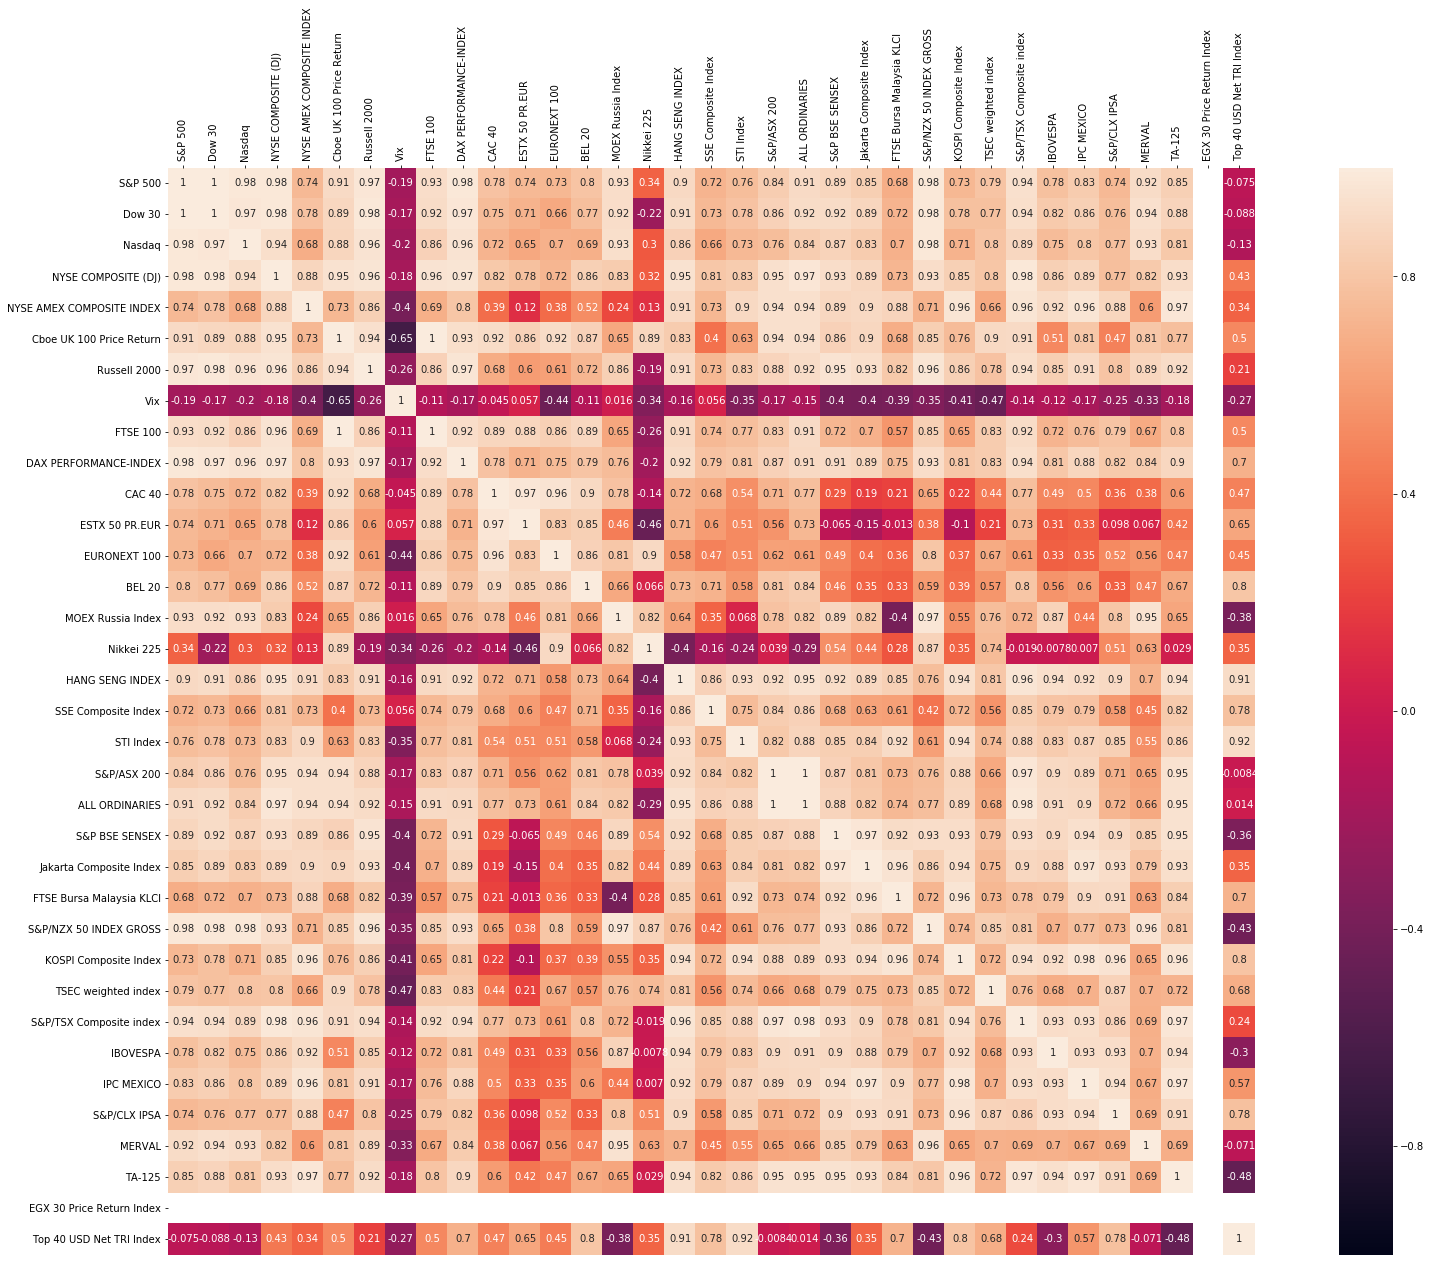

In [51]:
plt.figure(figsize=(30,20))
ax=sns.heatmap(corr,square=True,vmax=1.0,vmin=-1.0,linecolor='white',annot=True)
ax.xaxis.tick_top()
plt.xticks(rotation=90)

# 計算指數average profit

In [7]:
pct_change=adjclose.pct_change()
profit=pct_change.mean()
profit.sort_values()

Top 40 USD Net TRI Index    -0.000141
EGX 30 Price Return Index    0.000000
EURONEXT 100                 0.000074
TSEC weighted index          0.000097
FTSE Bursa Malaysia KLCI     0.000119
Cboe UK 100 Price Return     0.000126
BEL 20                       0.000174
CAC 40                       0.000193
STI Index                    0.000196
ESTX 50 PR.EUR               0.000203
S&P/ASX 200                  0.000213
Nikkei 225                   0.000221
S&P/TSX Composite index      0.000233
FTSE 100                     0.000233
NYSE AMEX COMPOSITE INDEX    0.000245
ALL ORDINARIES               0.000249
KOSPI Composite Index        0.000252
NYSE COMPOSITE (DJ)          0.000264
S&P 500                      0.000288
Russell 2000                 0.000293
S&P/CLX IPSA                 0.000300
TA-125                       0.000316
DAX PERFORMANCE-INDEX        0.000334
MOEX Russia Index            0.000337
Dow 30                       0.000339
HANG SENG INDEX              0.000343
S&P/NZX 50 I

# 計算指數annual sharpe ratio

In [8]:
risk=pct_change.std()
sharpe=profit/risk*(252**0.5)
sharpe.sort_values().dropna()

Top 40 USD Net TRI Index    -0.158010
EURONEXT 100                 0.099734
TSEC weighted index          0.125149
FTSE Bursa Malaysia KLCI     0.166905
Cboe UK 100 Price Return     0.245234
CAC 40                       0.248673
KOSPI Composite Index        0.261641
BEL 20                       0.270404
ESTX 50 PR.EUR               0.270582
STI Index                    0.288912
Nikkei 225                   0.293238
HANG SENG INDEX              0.370596
FTSE 100                     0.373649
Russell 2000                 0.397786
S&P/ASX 200                  0.401130
NYSE AMEX COMPOSITE INDEX    0.412787
DAX PERFORMANCE-INDEX        0.418459
S&P/TSX Composite index      0.422012
SSE Composite Index          0.425797
NYSE COMPOSITE (DJ)          0.440581
TA-125                       0.451032
ALL ORDINARIES               0.451046
Vix                          0.464034
S&P 500                      0.465482
Jakarta Composite Index      0.468858
S&P BSE SENSEX               0.480585
Nasdaq      

# 計算指數移動窗格252天annual sharpe ratio

In [9]:
profit=pct_change.rolling(252).mean()
risk=pct_change.rolling(252).std()
sharpe=profit/risk*(252**0.5)
sharpe.tail()

,S&P 500,Dow 30,Nasdaq,NYSE COMPOSITE (DJ),NYSE AMEX COMPOSITE INDEX,Cboe UK 100 Price Return,Russell 2000,Vix,FTSE 100,DAX PERFORMANCE-INDEX,...,KOSPI Composite Index,TSEC weighted index,S&P/TSX Composite index,IBOVESPA,IPC MEXICO,S&P/CLX IPSA,MERVAL,TA-125,EGX 30 Price Return Index,Top 40 USD Net TRI Index
Date,,,,,,,,,,,,,,,,,,,,,
2019-08-12,0.377245,0.226480,0.365732,0.196583,-0.546798,0.272836,-0.074452,0.616690,0.284005,0.165362,...,-0.806869,0.490115,0.630752,1.071655,-0.974385,-0.100169,0.215904,0.276987,NaN,0.113360
2019-08-13,0.514240,0.358598,0.487612,0.337637,-0.403884,0.391359,0.028543,0.422661,0.425812,0.366447,...,-0.679995,0.581455,0.803434,1.165003,-0.965123,-0.081492,0.433564,0.477978,NaN,0.310178
2019-08-14,0.525930,0.313585,0.569300,0.319649,-0.332385,0.246776,0.082647,0.455647,0.287428,0.258826,...,-0.591985,0.651780,0.885404,1.143530,-1.025125,-0.140948,0.419551,0.218412,NaN,0.179812
2019-08-15,0.420373,0.232150,0.412376,0.249576,-0.458532,0.127320,-0.064046,0.454292,0.135276,0.136251,...,-0.461024,0.802022,0.849741,1.007118,-1.082794,-0.143477,0.410843,0.269170,NaN,0.161813
2019-08-16,0.637304,0.392231,0.614605,0.449013,-0.308065,0.306643,0.124865,0.347513,0.278788,0.296217,...,-0.366558,0.913669,0.971529,0.945039,-0.885118,-0.104250,0.366690,0.269170,NaN,0.273746


# 繪製台股加權平均指數和移動窗格252天annual sharpe ratio

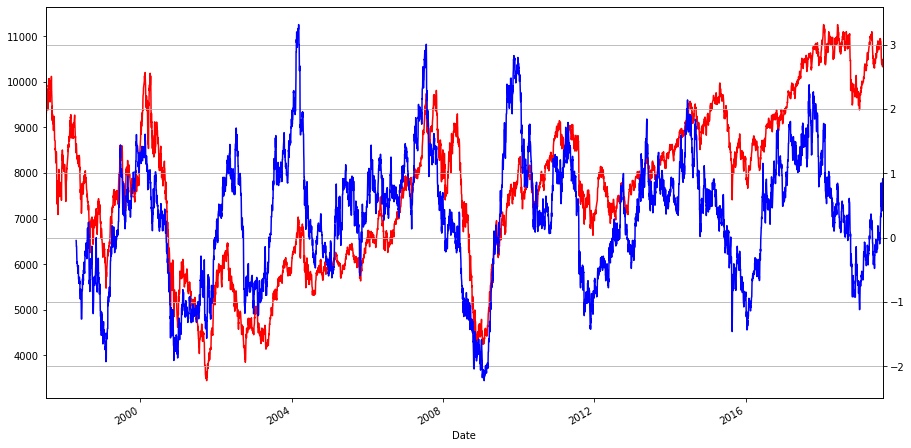

In [10]:
#當sharpe ratio比較低時,台股也都是在比較低點
#當sharpe ratio比較高時,台股也都是在比較高點
#當sharpe ratio轉折時,通常也是台股會轉折的時候

figure=plt.figure(figsize=(15,8))
adjclose['TSEC weighted index'].dropna().plot(color='r')
sharpe['TSEC weighted index'].dropna().plot(color='b',secondary_y=True)
plt.grid()

# 將sharpe curve平滑化

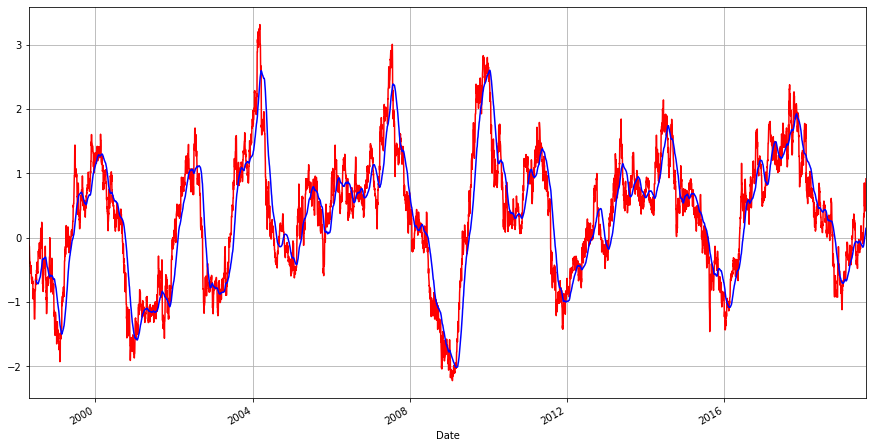

In [11]:
sr=sharpe['TSEC weighted index'].dropna()
d=60
srsma=sr.rolling(d).mean()

plt.figure(figsize=(15,8))
sr.plot(color='r')
srsma.plot(color='b')
plt.grid()

# 計算sharpe curve的斜率

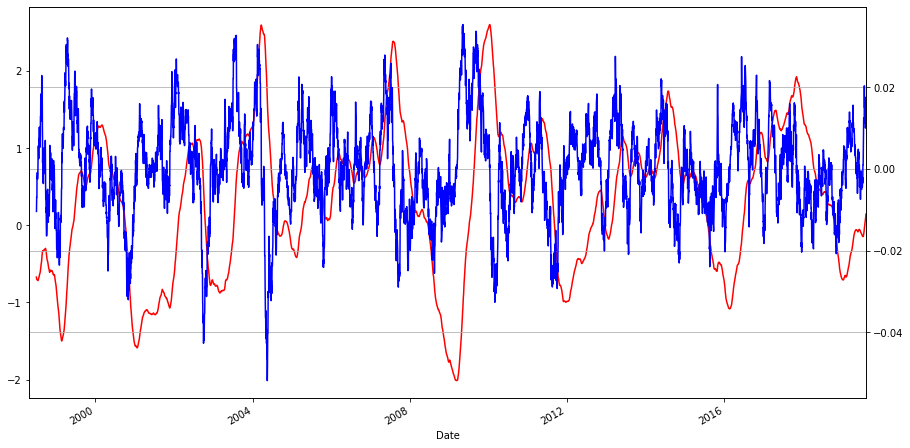

In [12]:
srsmadiff=srsma.diff()

plt.figure(figsize=(15,8))
srsma.plot(color='r')
srsmadiff.plot(color='b',secondary_y=True)
plt.grid()

# 尋找買入賣出轉折點

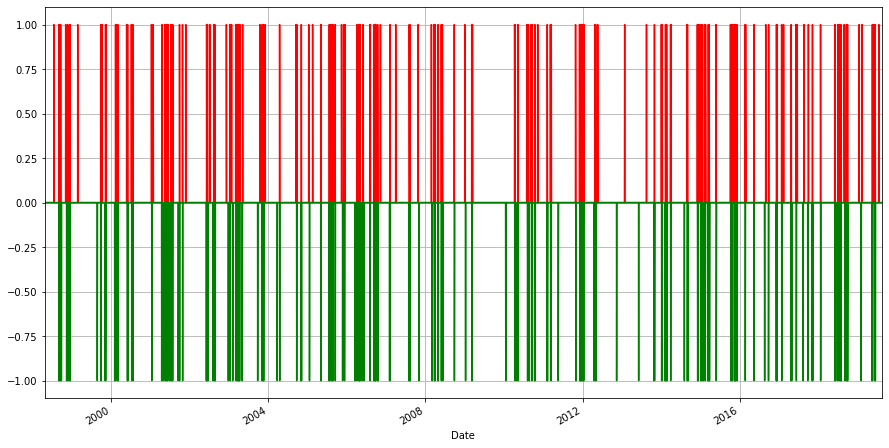

In [13]:
#找轉折點:斜率由正到負or斜率由負到正的瞬間
#當sharpe ratio往上轉折時，則買入
#當sharpe ratio往下轉折時，則賣出
buy=(srsmadiff>0)&(srsmadiff.shift()<0)
sell=(srsmadiff<0)&(srsmadiff.shift()>0)

plt.figure(figsize=(15,8))
(buy*1).plot(color='r')
(sell*-1).plot(color='g')
plt.grid()

# 找出持有的時段

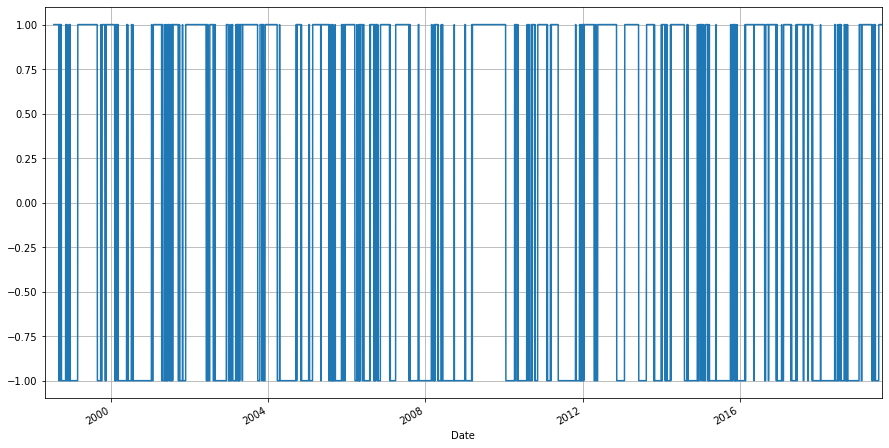

In [14]:
hold=pd.Series(np.nan,index=buy.index)
hold[buy]=1
hold[sell]=-1
hold.ffill(inplace=True)

plt.figure(figsize=(15,8))
hold.plot()
plt.grid()

# 不考慮手續費下回測

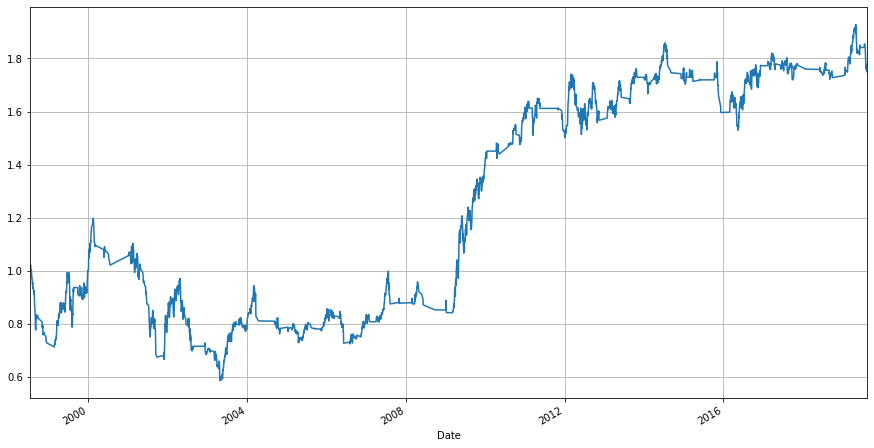

In [15]:
twii=adjclose['TSEC weighted index'][buy.index]

#pct_change:每天獲利上下x％。
pct_change=twii.pct_change()
#pct_ratio:買入之後每天的價格變化（不漲不跌是1,大於1則漲,小於1則跌）
pct_ratio=(pct_change.shift(-1)+1)

plt.figure(figsize=(15,8))
#將「持有」時間段的pct_ratio全部都乘起來,代表獲利
pct_ratio.fillna(1)[hold==1].cumprod().plot()
plt.grid()

# 定義參數最佳化函數

In [17]:
def backtest(a,b,c,d):
    #當sharpe ratio比較低時,台股也都是在比較低點
    #當sharpe ratio比較高時,台股也都是在比較高點
    #當sharpe ratio轉折時,通常也是台股會轉折的時候
    sr=sharpe['TSEC weighted index'].dropna()
    srsma=sr.rolling(a).mean()

    srsmadiff=srsma.diff()*100
    ub=srsmadiff.quantile(b)
    lb=srsmadiff.quantile(c)
    
    #找轉折點:斜率由正到負or斜率由負到正的瞬間
    #當sharpe ratio往上轉折時,則買入
    #當sharpe ratio往下轉折時,則賣出
    buy=(srsmadiff>ub)&(srsmadiff.shift(d)<lb)
    sell=(srsmadiff<lb)&(srsmadiff.shift(d)>ub)

    hold=pd.Series(np.nan,index=buy.index)
    hold[buy]=1
    hold[sell]=0

    hold.ffill(inplace=True)
    
    adj=adjclose['TSEC weighted index'][buy.index]

    eq=(adj.pct_change().shift(-1)+1).fillna(1)[hold==1].cumprod()
    
    if len(eq)>0:
        return eq.iloc[-1]
    else:
        return 1
    
backtest(252,0.4,0.6,4)

1.5908268282277174

In [18]:
maxeq=0

for a in range(100,200,20):
    for b in np.arange(0.3,0.9,0.03):
        for c in np.arange(0.3,0.6,0.03):
            for d in range(60,180,10):
                eq=backtest(a,b,c,d)
                
                if maxeq<eq:
                    maxeq=eq
                    print(eq,a,b,c,d)

2.30133130924931 100 0.3 0.3 60
2.6117495135341247 100 0.3 0.4199999999999999 90
2.682957700081869 100 0.3 0.4799999999999998 70
3.0290321439292924 100 0.3 0.5099999999999998 70
3.1516318403940744 100 0.32999999999999996 0.4799999999999998 70
3.814296759830583 100 0.32999999999999996 0.5099999999999998 70
